# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.head(4)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


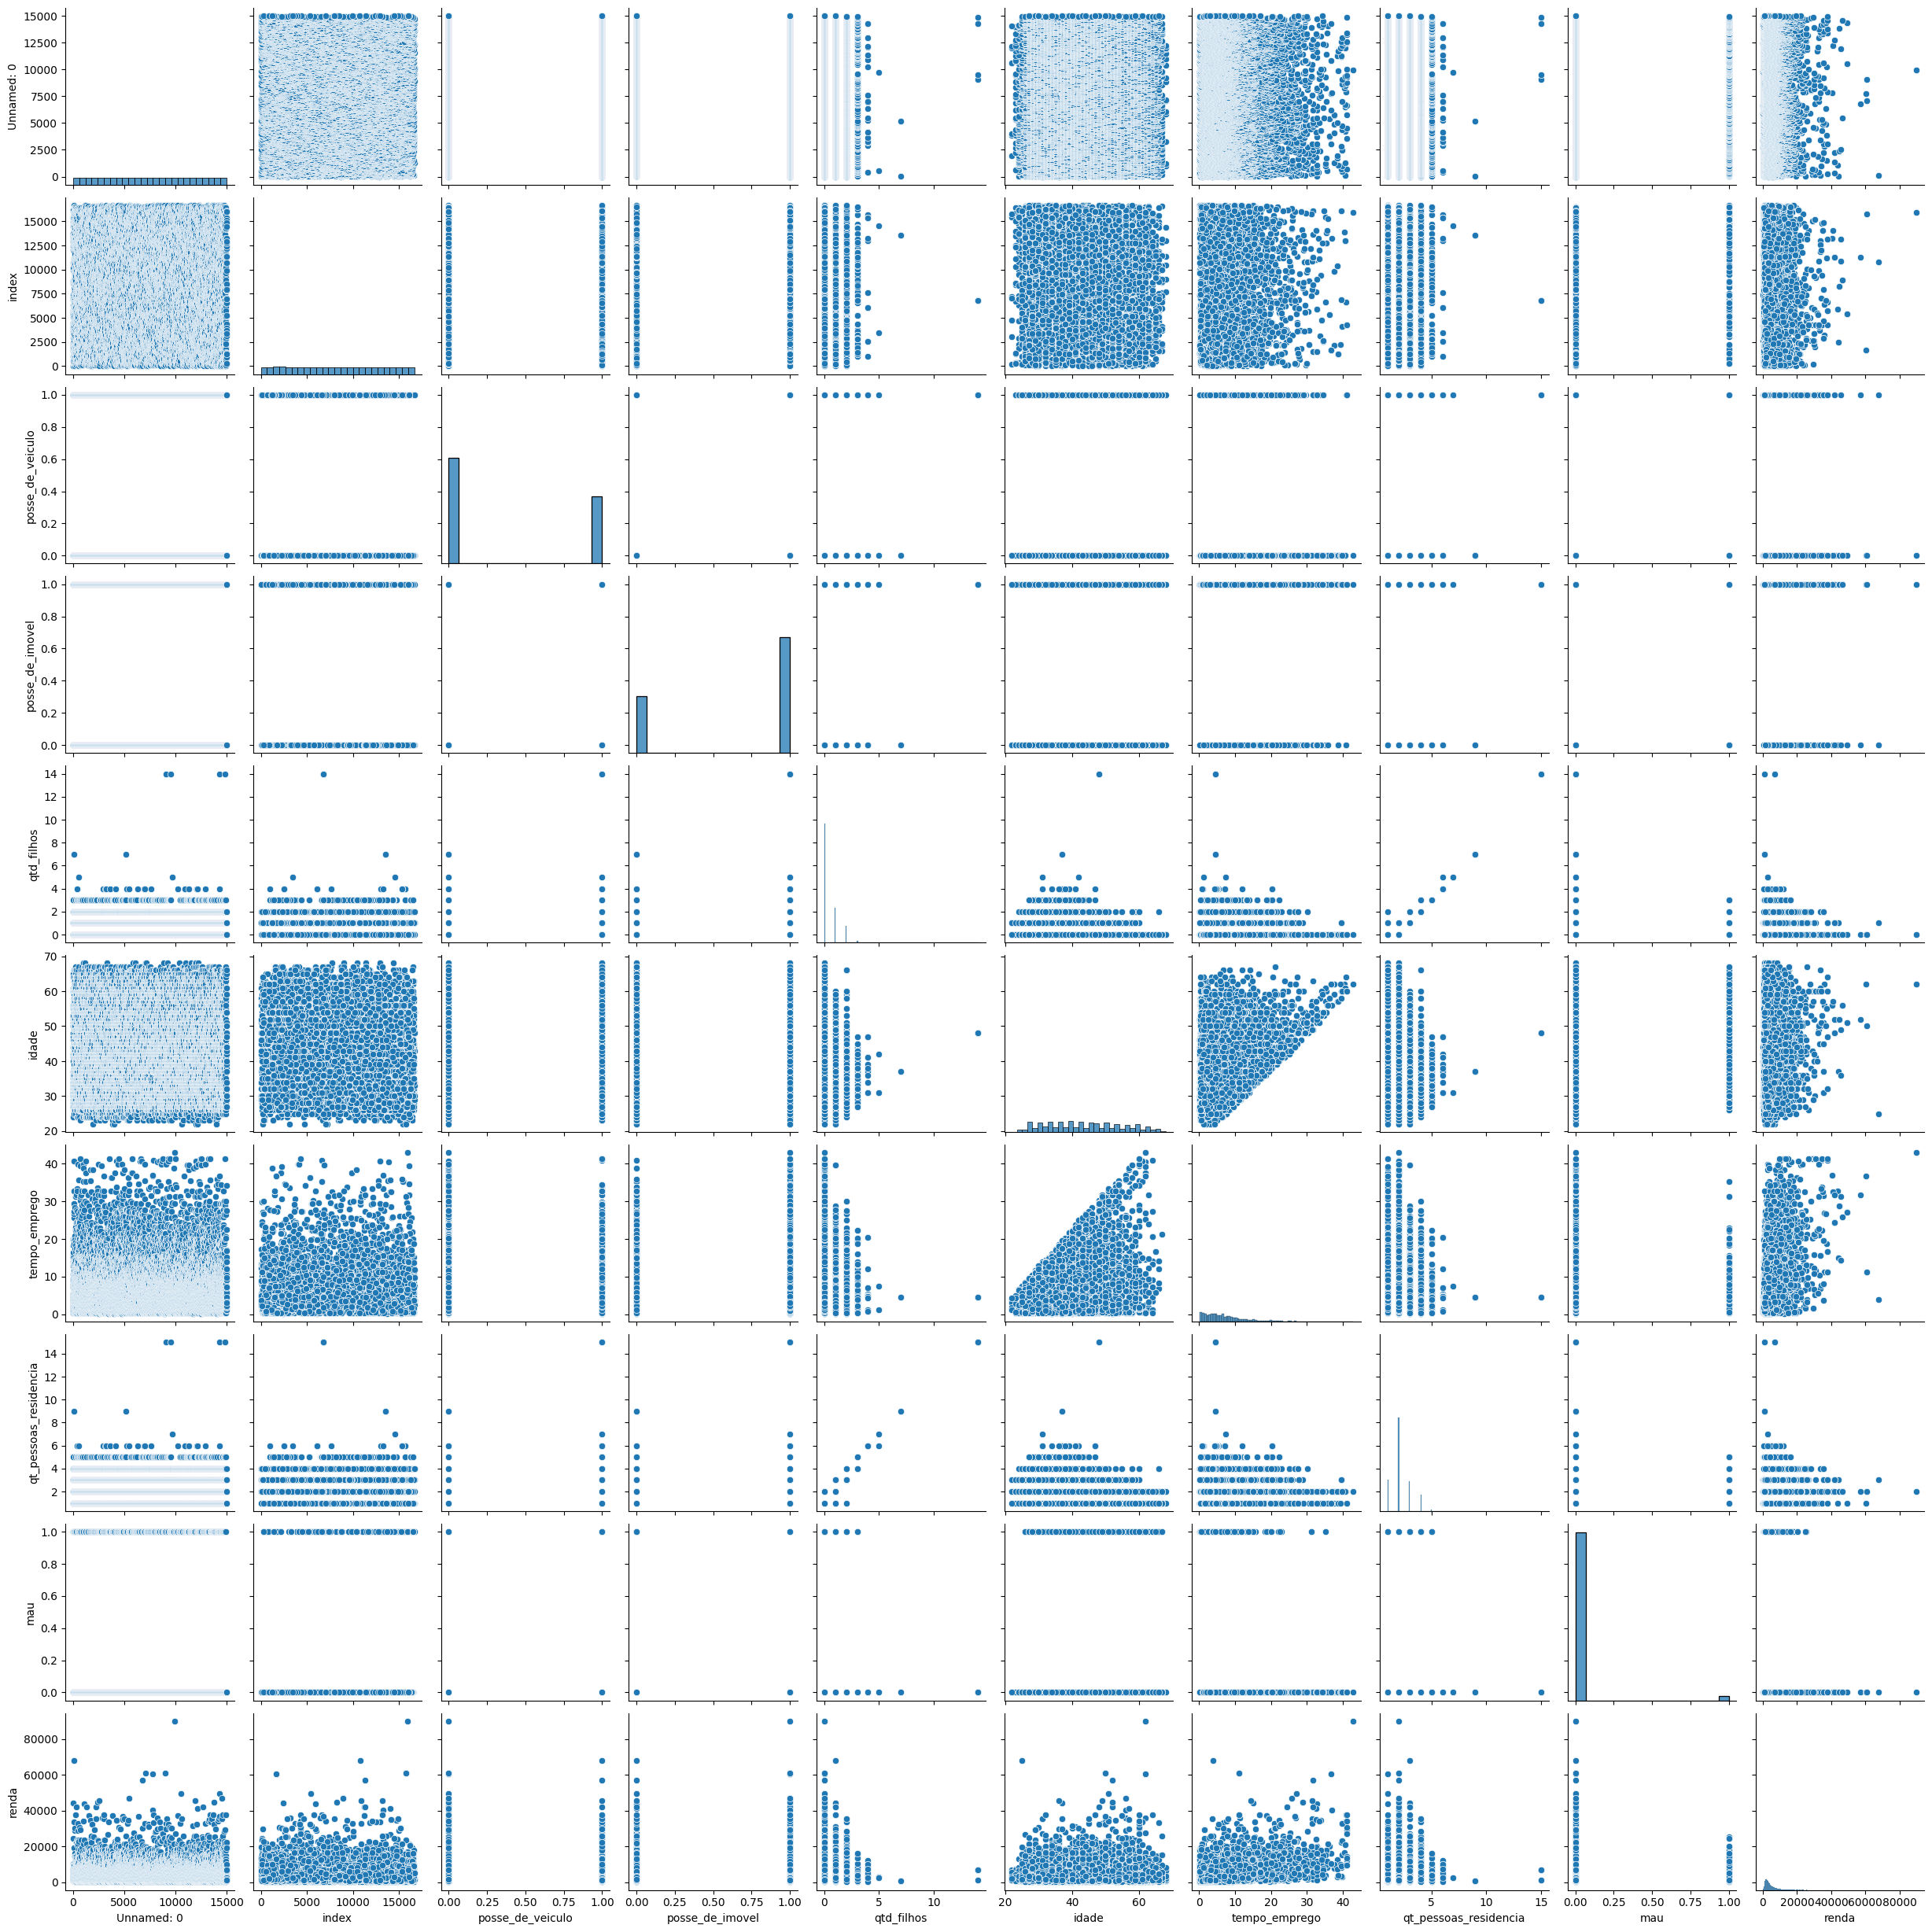

In [4]:
sns.pairplot(df)
plt.show()

<ipython-input-6-4b67ffb0ba0f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


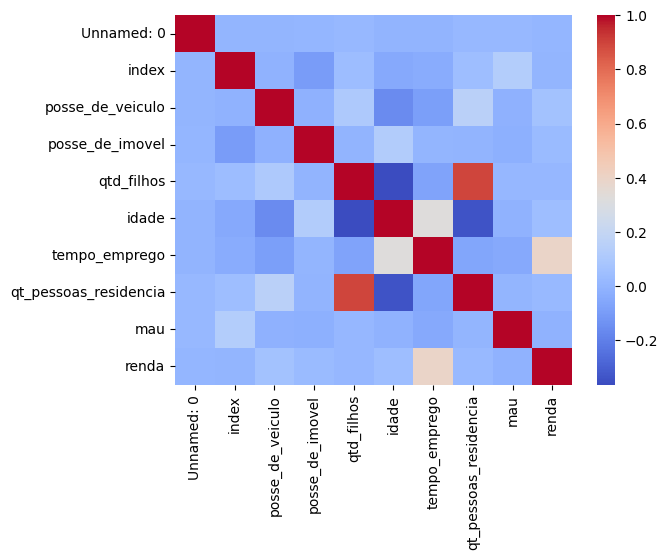

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [26]:
correlations = df.corr()['renda'].sort_values(ascending=False)
top_variables = correlations.index[1:3]

<ipython-input-26-ba131fd97f80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['renda'].sort_values(ascending=False)


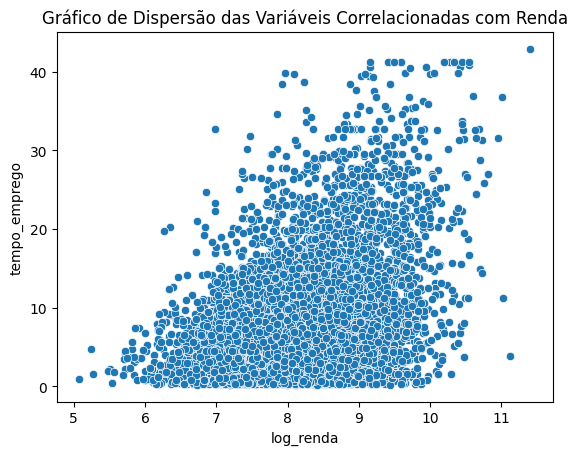

In [27]:
sns.scatterplot(x=top_variables[0], y=top_variables[1], data=df)
plt.title('Gráfico de Dispersão das Variáveis Correlacionadas com Renda')
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.show()

3) Na su aopinião, há outliers na variável renda?

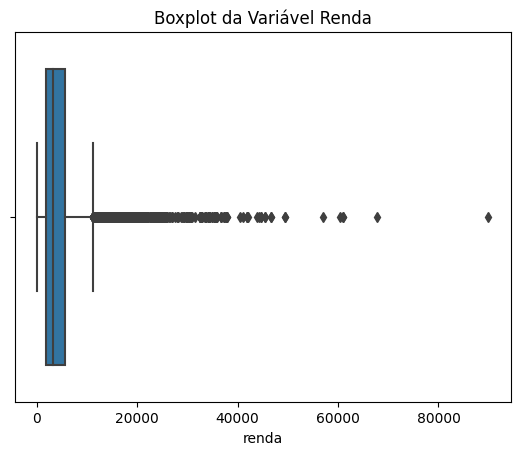

In [28]:
sns.boxplot(x=df['renda'])
plt.title('Boxplot da Variável Renda')
plt.show()

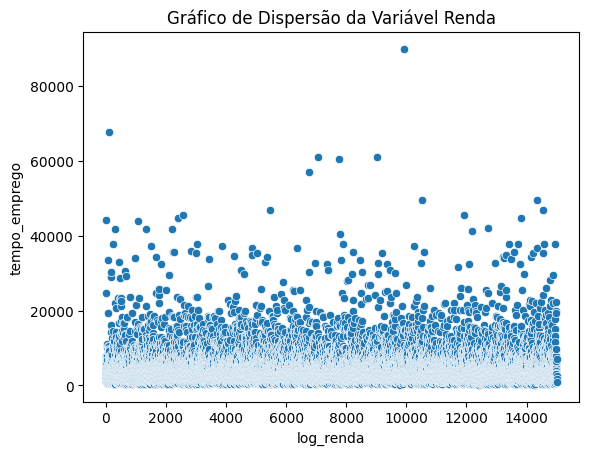

In [29]:
sns.scatterplot(x=df.index, y=df['renda'])
plt.title('Gráfico de Dispersão da Variável Renda')
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.show()

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [30]:
df['log_renda'] = np.log1p(df['renda'])
df['log_renda']


0        8.122739
1        8.715575
2        8.641176
3        8.888438
4        8.298632
           ...   
14995    7.085307
14996    7.832086
14997    7.370136
14998    8.850287
14999    6.902602
Name: log_renda, Length: 15000, dtype: float64

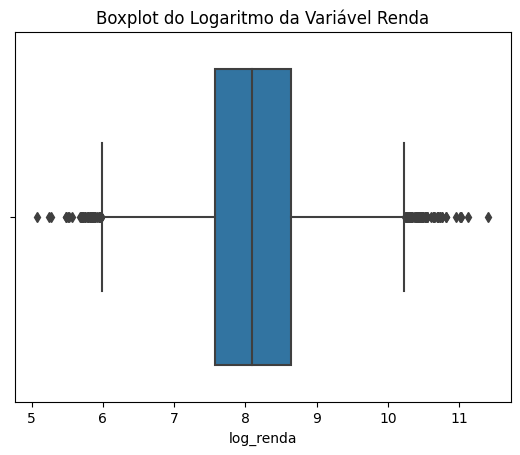

In [32]:
sns.boxplot(x=df['log_renda'])
plt.title('Boxplot do Logaritmo da Variável Renda')
plt.show()

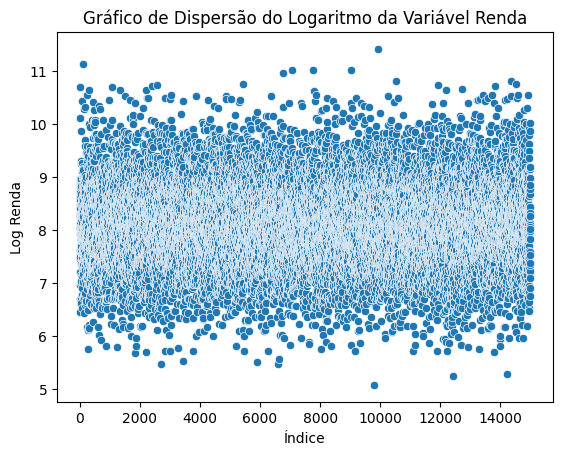

In [33]:
sns.scatterplot(x=df.index, y=df['log_renda'])

plt.title('Gráfico de Dispersão do Logaritmo da Variável Renda')

plt.xlabel('Índice')
plt.ylabel('Log Renda')

plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re